In [1]:
import pandas as pd
import numpy as np
import os
import shutil
import csv

import numpy as np
import pandas as pd
from pathlib import Path
import os.path
import matplotlib.pyplot as plt
import tensorflow as tf
import glob
import random

import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
label=['bkl', 'nv', 'df', 'mel', 'vasc', 'bcc', 'akiec']

# bkl=Benign keratosis (solar lentigo / seborrheic keratosis / lichen planus-like keratosis)
# nv=Melanocytic nevus
# df=Dermatofibroma
# mel=Melanoma
# vasc=Vascular lesion
# bcc=Basal cell carcinoma
# akiec=Actinic keratosis


In [23]:
#creating every folder metadata
data=pd.DataFrame()
for i in label:
    train_dir = os.getcwd()+'/'+"image"+'/'+i
    train_filepaths = list(os.listdir(train_dir))

    name = pd.Series(train_filepaths, name='Filename').astype(str)
    labels = pd.Series(i, name='Label')

        # Concatenate filepaths and labels
    df=pd.concat([name, labels], axis=1)
    df['Label']=df['Label'].fillna(i)
    
    filename = f'data_{i}.csv'
    df.to_csv(filename, index=False)



In [24]:
#combining every metadata to one single csv file
import pandas as pd
import os

# set the directory where the CSV files are located
directory =os.getcwd()

# create an empty list to hold the dataframes
df_list = []

# iterate through each file in the directory
for filename in os.listdir(directory):
    if filename.endswith('.csv'):
        filepath = os.path.join(directory, filename)
        # read the CSV file into a Pandas dataframe and append it to the list
        df_list.append(pd.read_csv(filepath))

# concatenate the dataframes in the list into a single dataframe
merged_df = pd.concat(df_list, ignore_index=True)

# write the merged dataframe to a new CSV file
merged_df.to_csv('data.csv', index=False)

In [25]:
data=pd.read_csv('data.csv')
data

,Filename,Label
0,ISIC_0030870.jpg,df
1,ISIC_0034169.jpg,df
2,ISIC_0054702.jpg,df
3,ISIC_0028346.jpg,df
4,ISIC_0071233.jpg,df
...,...,...
9922,ISIC_0054451.jpg,bcc
9923,ISIC_0057170.jpg,bcc
9924,ISIC_0058257.jpg,bcc
9925,ISIC_0059149.jpg,bcc


In [26]:
data['Label'].unique()

array(['df', 'vasc', 'nv', 'akiec', 'bkl', 'mel', 'bcc'], dtype=object)

In [27]:
data['Label'].value_counts()

nv       2202
bkl      2124
bcc      2023
mel      2022
akiec    1064
vasc      253
df        239
Name: Label, dtype: int64

## EDA

In [28]:
data.duplicated().sum()

0

In [29]:
data.describe(include='all')

,Filename,Label
count,9927,9927
unique,9927,7
top,ISIC_0030870.jpg,nv
freq,1,2202


<Axes: xlabel='Label', ylabel='Count'>

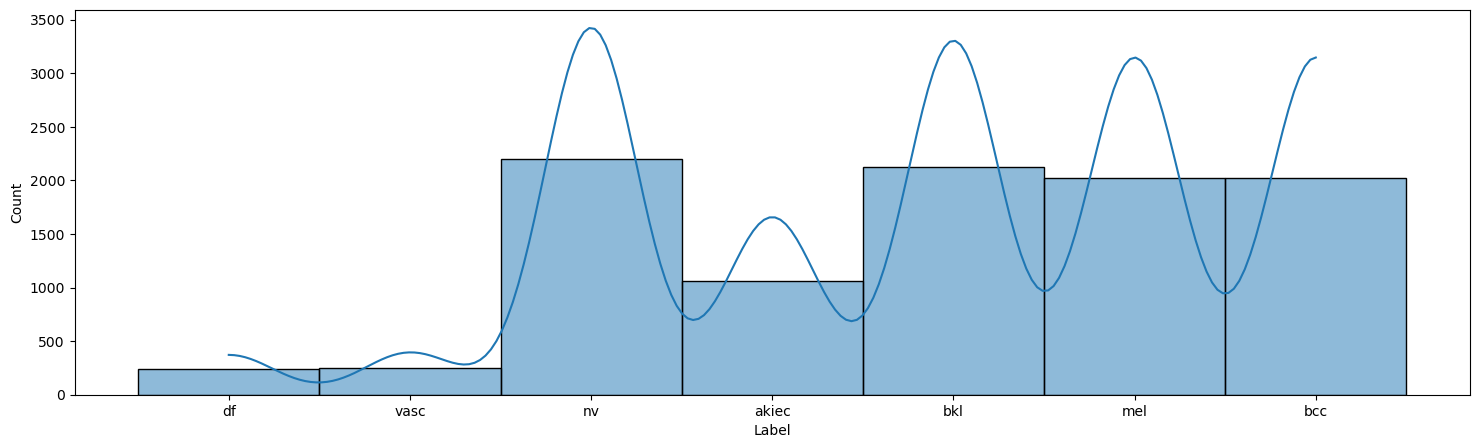

In [30]:
plt.figure(figsize=(18,5))
sns.histplot(x='Label',data=data,kde=True)

<Axes: xlabel='count', ylabel='Label'>

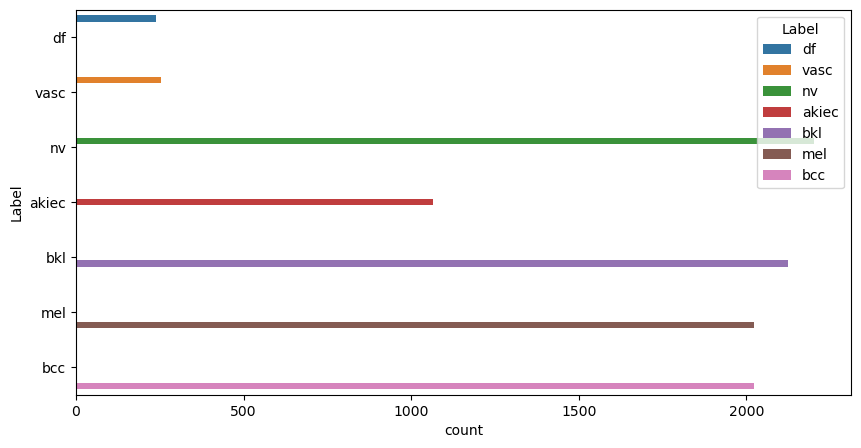

In [31]:
fig, ax1 = plt.subplots(1, 1, figsize = (10, 5))
sns.countplot(y='Label',data=data, hue="Label",ax=ax1)

# deleting the excess data randomly


In [65]:
## don't run
import os
import random

class_name ='akiec' #your directory
dataset_path =os.getcwd()+'/'+"image"

class_dir = os.path.join(dataset_path, class_name)

# Get a list of all images in the class directory
# images = os.listdir(class_dir)
for i in range(#):
    images = os.listdir(class_dir)
    # Choose a random image to delete
    image_to_delete = random.choice(images)

    # Delete the image
    os.remove(os.path.join(class_dir, image_to_delete))
#     print(f"Deleted {image_to_delete} from {class_name} class.")


print(f"Deleted {image_to_delete} from {class_name} class.")


Deleted ISIC_0062184_0_6147.jpg from akiec class.


# data augumentation


In [60]:
from keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
from tensorflow import keras
# Define data generator with augmentation parameters
data_gen = ImageDataGenerator(
    rotation_range=15,  
    width_shift_range=0.12,  
    height_shift_range=0.12,
    zoom_range=0.15,
    shear_range=0.2,  
    horizontal_flip=True,  
    fill_mode='nearest'  
)

# Define input directory and output directory
input_dir =os.getcwd()+'/'+'image_copy'+'/'+'akiec'
output_dir = os.getcwd()+'/'+'image'+'/'+'akiec'

# Get list of image filenames in input directory
img_filenames = os.listdir(input_dir)

# Loop through each image file and apply augmentation
for img_filename in img_filenames:
    # Load image
    img = tf.keras.utils.load_img(os.path.join(input_dir, img_filename))
    
    # Convert image to numpy array
    x = tf.keras.utils.img_to_array(img)
    x = x.reshape((1,) + x.shape)
    
    # Apply augmentation and save resulting images to output directory
    i = 0
    for batch in data_gen.flow(x, batch_size=1, save_to_dir=output_dir, save_prefix=img_filename.split('.')[0], save_format='jpg'):
        i += 1
        if i > 2:  # generate 4 augmented images for each input image
            break


# creating the metadata of all classes

In [66]:
#creating every folder metadata
data=pd.DataFrame()
for i in label:
    train_dir = os.getcwd()+'/'+"image"+'/'+i
    train_filepaths = list(os.listdir(train_dir))

    name = pd.Series(train_filepaths, name='Filename').astype(str)
    labels = pd.Series(i, name='Label')

        # Concatenate filepaths and labels
    df=pd.concat([name, labels], axis=1)
    df['Label']=df['Label'].fillna(i)
    
    filename = f'data_{i}.csv'
    df.to_csv(filename, index=False)

#combining every metadata to one single csv file
import pandas as pd
import os

# set the directory where the CSV files are located
directory =os.getcwd()

# create an empty list to hold the dataframes
df_list = []

# iterate through each file in the directory
for filename in os.listdir(directory):
    if filename.endswith('.csv'):
        filepath = os.path.join(directory, filename)
        # read the CSV file into a Pandas dataframe and append it to the list
        df_list.append(pd.read_csv(filepath))

# concatenate the dataframes in the list into a single dataframe
merged_df = pd.concat(df_list, ignore_index=True)

# write the merged dataframe to a new CSV file
merged_df.to_csv('data.csv', index=False)

In [67]:
df=pd.read_csv('data.csv')
df

,Filename,Label
0,ISIC_0031443_0_8557.jpg,df
1,ISIC_0024553_0_9818.jpg,df
2,ISIC_0073189_0_5841.jpg,df
3,ISIC_0033675_0_7195.jpg,df
4,ISIC_0059504_0_2378.jpg,df
...,...,...
14886,ISIC_0054451.jpg,bcc
14887,ISIC_0057170.jpg,bcc
14888,ISIC_0058257.jpg,bcc
14889,ISIC_0059149.jpg,bcc


In [68]:
df['Label'].value_counts()

vasc     2277
nv       2202
df       2151
bkl      2124
akiec    2092
bcc      2023
mel      2022
Name: Label, dtype: int64

<Axes: xlabel='Label', ylabel='Count'>

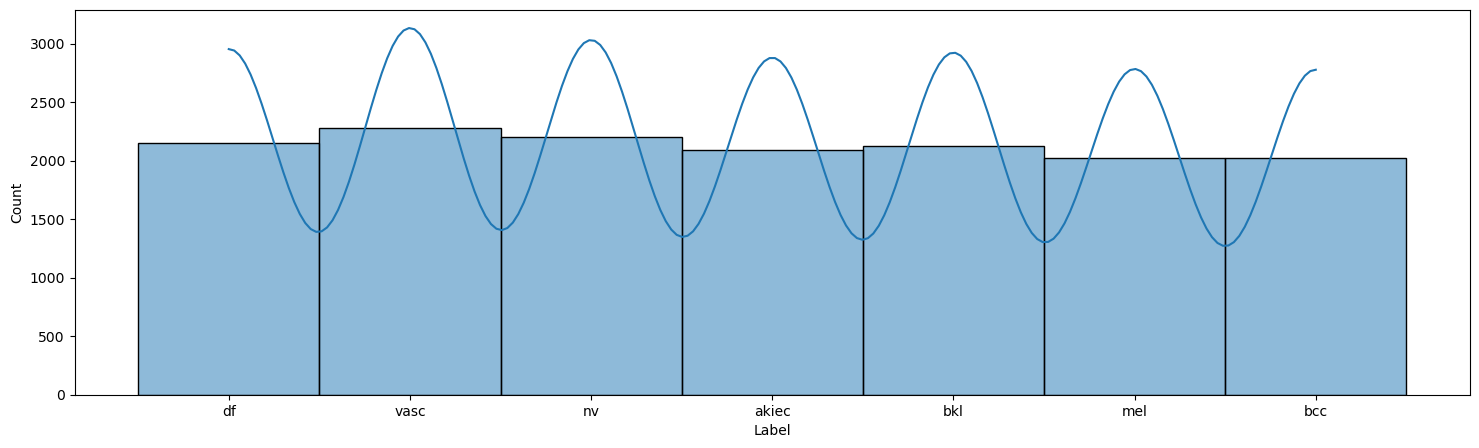

In [69]:
plt.figure(figsize=(18,5))
sns.histplot(x='Label',data=df,kde=True)

# image resizing

In [72]:
import cv2
path=os.getcwd()+'/'+"image"+'/'+'bcc'+'/'+'ISIC_0024332.jpg'
# read image
img = cv2.imread(path, cv2.IMREAD_UNCHANGED)
 
# get dimensions of image
dimensions = img.shape
print(dimensions)

(450, 600, 3)


In [74]:
for i in label:
    os.mkdir(os.getcwd()+'/'+"preprocess_img"+"/"+str(i))

In [82]:
import os
for i in label:
    dir_path =os.getcwd()+'/'+"image"+'/'+i  # Replace with the path to your directory

    for filename in os.listdir(dir_path):
        if not (filename.endswith(".jpeg") or filename.endswith(".jpg")):
            os.remove(os.path.join(dir_path, filename))


In [83]:
from PIL import Image
import os

# Set input and output paths
for i in label:
    input_path =os.getcwd()+'/'+"image"+'/'+i
    output_path =os.getcwd()+'/'+"preprocess_img"+'/'+i

        # Set desired size
    size = (256, 256)

        # Loop over input images and resize
    for filename in os.listdir(input_path):
        with Image.open(os.path.join(input_path, filename)) as img:
            img = img.resize(size)
            img.save(os.path.join(output_path, filename))


# data suffle

In [90]:
df=pd.read_csv("data.csv")
df

,Filename,Label
0,ISIC_0031443_0_8557.jpg,df
1,ISIC_0024553_0_9818.jpg,df
2,ISIC_0073189_0_5841.jpg,df
3,ISIC_0033675_0_7195.jpg,df
4,ISIC_0059504_0_2378.jpg,df
...,...,...
14886,ISIC_0054451.jpg,bcc
14887,ISIC_0057170.jpg,bcc
14888,ISIC_0058257.jpg,bcc
14889,ISIC_0059149.jpg,bcc


In [95]:
##suffeling the data
df = df.sample(frac=1).reset_index(drop = True)
df

,Unnamed: 0,Filename,Label
0,2320,ISIC_0073110_0_8248.jpg,vasc
1,3137,ISIC_0072430_0_4186.jpg,vasc
2,1550,ISIC_0026254_0_7980.jpg,df
3,11593,ISIC_0024333.jpg,mel
4,1380,ISIC_0033790_0_5330.jpg,df
...,...,...,...
14886,5099,ISIC_0026096.jpg,nv
14887,1427,ISIC_0059265_0_7539.jpg,df
14888,2046,ISIC_0064115_0_2169.jpg,df
14889,13352,ISIC_0030690.jpg,bcc


In [96]:
# exporting the suffle data
df.to_csv('suffle_data.csv', header=True, index=False)

# data spliting

In [107]:
data=pd.read_csv("suffle_data.csv")
data

,Unnamed,Filename,Label
0,2320,ISIC_0073110_0_8248.jpg,vasc
1,3137,ISIC_0072430_0_4186.jpg,vasc
2,1550,ISIC_0026254_0_7980.jpg,df
3,11593,ISIC_0024333.jpg,mel
4,1380,ISIC_0033790_0_5330.jpg,df
...,...,...,...
14886,5099,ISIC_0026096.jpg,nv
14887,1427,ISIC_0059265_0_7539.jpg,df
14888,2046,ISIC_0064115_0_2169.jpg,df
14889,13352,ISIC_0030690.jpg,bcc


In [108]:
data.drop(columns=["Unnamed"], inplace=True)
data

,Filename,Label
0,ISIC_0073110_0_8248.jpg,vasc
1,ISIC_0072430_0_4186.jpg,vasc
2,ISIC_0026254_0_7980.jpg,df
3,ISIC_0024333.jpg,mel
4,ISIC_0033790_0_5330.jpg,df
...,...,...
14886,ISIC_0026096.jpg,nv
14887,ISIC_0059265_0_7539.jpg,df
14888,ISIC_0064115_0_2169.jpg,df
14889,ISIC_0030690.jpg,bcc


In [109]:
from sklearn.model_selection import train_test_split

In [113]:
x=data['Filename']
y=data['Label']

In [119]:
import splitfolders
splitfolders.ratio('/Users/prasantpoudel/Desktop/skin/preprocess_img', output="output", seed=1337, ratio=(.8, 0.1,0.1)) 

Copying files: 14890 files [00:06, 2408.72 files/s]


# model training

In [3]:
train_dir = Path("/Users/prasantpoudel/Desktop/skin/output/train")
train_filepaths = list(train_dir.glob(r'**/*.*'))

test_dir = Path(("/Users/prasantpoudel/Desktop/skin/output/test"))
test_filepaths = list(test_dir.glob(r'**/*.*'))

val_dir = Path(("/Users/prasantpoudel/Desktop/skin/output/val"))
val_filepaths = list(test_dir.glob(r'**/*.*'))

In [4]:
def proc_img(filepath):
    labels = [str(filepath[i]).split("/")[-2] \
              for i in range(len(filepath))]

    filepath = pd.Series(filepath, name='Filepath').astype(str)
    labels = pd.Series(labels, name='Label')

    # Concatenate filepaths and labels
    df = pd.concat([filepath, labels], axis=1)

    # Shuffle the DataFrame and reset index
    df = df.sample(frac=1).reset_index(drop = True)
    
    return df

In [5]:
train_df = proc_img(train_filepaths)
test_df = proc_img(test_filepaths)
val_df = proc_img(val_filepaths)

In [6]:
print('-- Training set --\n')
print(f'Number of pictures: {train_df.shape[0]}\n')
print(f'Number of different labels: {len(train_df.Label.unique())}\n')
print(f'Labels: {train_df.Label.unique()}')

-- Training set --

Number of pictures: 11909

Number of different labels: 8

Labels: ['bkl' 'akiec' 'mel' 'vasc' 'bcc' 'df' 'nv' 'train']


In [7]:
train_generator = tf.keras.preprocessing.image.ImageDataGenerator(
    preprocessing_function=tf.keras.applications.vgg19.preprocess_input
)

test_generator = tf.keras.preprocessing.image.ImageDataGenerator(
    preprocessing_function=tf.keras.applications.vgg19.preprocess_input
)


train_images = train_generator.flow_from_dataframe(
    dataframe=train_df,
    x_col='Filepath',
    y_col='Label',
    target_size=(224, 224),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=32,
    shuffle=True,
    seed=0,
    rotation_range=30,
    zoom_range=0.15,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.15,
    horizontal_flip=True,
    fill_mode="nearest"
)

val_images = train_generator.flow_from_dataframe(
    dataframe=val_df,
    x_col='Filepath',
    y_col='Label',
    target_size=(224, 224),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=32,
    shuffle=True,
    seed=0,
    rotation_range=30,
    zoom_range=0.15,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.15,
    horizontal_flip=True,
    fill_mode="nearest"
)

test_images = test_generator.flow_from_dataframe(
    dataframe=test_df,
    x_col='Filepath',
    y_col='Label',
    target_size=(224, 224),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=32,
    shuffle=False
)

Found 11908 validated image filenames belonging to 7 classes.
Found 1495 validated image filenames belonging to 7 classes.
Found 1495 validated image filenames belonging to 7 classes.


/Users/prasantpoudel/miniconda3/envs/tensorflow/lib/python3.10/site-packages/keras/preprocessing/image.py:1137: UserWarning: Found 1 invalid image filename(s) in x_col="Filepath". These filename(s) will be ignored.
  warnings.warn(
/Users/prasantpoudel/miniconda3/envs/tensorflow/lib/python3.10/site-packages/keras/preprocessing/image.py:1137: UserWarning: Found 1 invalid image filename(s) in x_col="Filepath". These filename(s) will be ignored.
  warnings.warn(
/Users/prasantpoudel/miniconda3/envs/tensorflow/lib/python3.10/site-packages/keras/preprocessing/image.py:1137: UserWarning: Found 1 invalid image filename(s) in x_col="Filepath". These filename(s) will be ignored.
  warnings.warn(


In [ ]:
from tensorflow.keras.layers import Dropout
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

pretrained_model = tf.keras.applications.VGG19(
    input_shape=(224, 224, 3),
    include_top=False,
    weights='imagenet',
)

for layer in pretrained_model.layers:
    layer.trainable = False

inputs = pretrained_model.input
x = pretrained_model.output
x = tf.keras.layers.Flatten(input_shape=(224,224,3))(x)
x = tf.keras.layers.Dense(128, activation='relu')(x)
x = Dropout(0.4)(x)
x = tf.keras.layers.Dense(128, activation='relu')(x)
x = Dropout(0.3)(x)
outputs = tf.keras.layers.Dense(7, activation='softmax')(x)

model = tf.keras.Model(inputs=inputs, outputs=outputs)

model.compile(optimizer=tf.keras.optimizers.legacy.Adam(learning_rate=0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Define the callbacks
ckpt = ModelCheckpoint('/content/model/model.h5',
                        monitor='val_loss', save_best_only=True, verbose=3)

estop = EarlyStopping(monitor='val_loss', patience=7, verbose=3, restore_best_weights=True)

lr = ReduceLROnPlateau(monitor='val_loss', patience=3, verbose=3)

callbacks = [ckpt, estop, lr]

# Train the model
history = model.fit(train_images,
                    validation_data=val_images,
                    epochs=9,
                    callbacks=callbacks)


Metal device set to: Apple M1


2023-04-09 17:31:36.974070: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-04-09 17:31:36.974100: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Epoch 1/9


2023-04-09 17:31:38.668864: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2023-04-09 17:31:39.231630: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


 24/373 [>.............................] - ETA: 7:26 - loss: 5.0006 - accuracy: 0.1836